# Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/CS231.M11 Final Project"

/content/drive/MyDrive/CS231.M11 Final Project


# Install necessary library

In [ ]:
!git clone https://github.com/thelahunginjeet/pyrankagg.git

fatal: destination path 'pyrankagg' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/thelahunginjeet/kbutil.git

fatal: destination path 'kbutil' already exists and is not an empty directory.


# Import library

In [ ]:
from keras.preprocessing import image
from keras.applications.resnet_v2 import ResNet50V2
from keras.models import Model
import numpy as np
import pandas as pd
import os,glob
import cv2
import scipy
import pickle as pickle
import random
from PIL import Image
import requests
from io import BytesIO

import matplotlib.pyplot as plt
import requests
from scipy import integrate
from tqdm import tqdm_notebook

In [ ]:
path_database ='/content/drive/MyDrive/CS231.M11 Final Project/dataset'
# path_database ='/content/drive/MyDrive/CS231.M11 Final Project/new_dataset'
path = './'

# Extract feature of image using ResNet50

In [ ]:
# Tài liệu về mô hình pretrained ResNet50V2
from google.colab.patches import cv2_imshow
base_model = ResNet50V2(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
img_size = 224
# function extract_features có nhiệm vụ trích xuất đặc trưng của từng loại ảnh
def extract_features(img_path, choice):  # img is from PIL.Image.open(path) or keras.preprocessing.image.load_img(path)
    if choice == 'invert': # tạo ảnh âm bản
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.bitwise_not(img)
    elif choice == 'gray': # tạo ảnh trắng đen
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
    elif choice == 'invert-gray': # ảnh âm bản của trắng đen
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size)) 
        # img = cv2.bitwise_not(img)
    else:
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size, img_size))
    
    if choice in ['gray', 'invert-gray']:
        img = np.stack((img,)*3, axis=-1)

    x = np.array(img) / 255
    # Reshaping data từ 1 chiều thành 3 chiều
    x = x.reshape(-1, img_size, img_size, 3)
    feature = model.predict(x)[0]  # (1, 4096) -> (4096, )
    return feature / np.linalg.norm(feature)  # Normalize

102883328/102869336 [==============================] - 1s 0us/step


# Handle extract feature all images in dataset base on types

In [ ]:
#đọc tất cả bức ảnh trong cơ sở dữ liệu, sau đó rút trích đặc trưng biểu diễn lưu thông tin lại
path_features = '/content/drive/MyDrive/CS231.M11 Final Project/features/'
# path_features = '/content/drive/MyDrive/CS231.M11 Final Project/new_features/'
def batch_extractor(urls, prefix_pickled_db_path="features_", types=None):
    # types = ['invert', 'gray', 'invert-gray']
    for t in types: # lần lượt convert qua các loại
        result = {}
        count = 0
        print('Dang xu ly dang: ', t)
        for url in tqdm_notebook(urls):
            # try:
                name = url
                # print("name True: ", name)
                result[name] = extract_features(url, t) # mảng result có dạng: [image1_url:vector1, image2_url: vector2]
                count +=1
            # except:
            #     print(url)
            # continue

        print("So luong nhan trong CSDL: ", count)
        # Lưu các đặc trưng biểu diễn bức ảnh dưới dạng file pickle
        with open(path_features + prefix_pickled_db_path + t + '.pck', 'wb') as fp:
            pickle.dump(result, fp)

# Get path of all image in dataset

In [ ]:
# Đọc dữ liệu từ đường dẫn và lưu nhãn của nó
labels = ['horse',
          'elephant',
          'chicken',
          'cat',
          'cow',
          "sheep",
          "squirrel",
          "lion",
          "tiger",
          "wolf",
          "fox",
          "monkey",
          "dog",
          "rabbit",
          "bird"
          ]
img_size = 224
def get_data(data_dir):
    urls = [] 
    for label in labels:
        print("Đang đọc dữ liệu của nhãn :", label)
        path = os.path.join(data_dir, label)
        for f in os.listdir(path):
          path_img = os.path.join(path,f)
          urls.append(path_img)
    return urls
urls = get_data(path_database)
print(len(urls))

Đang đọc dữ liệu của nhãn : horse
Đang đọc dữ liệu của nhãn : elephant
Đang đọc dữ liệu của nhãn : chicken
Đang đọc dữ liệu của nhãn : cat
Đang đọc dữ liệu của nhãn : cow
Đang đọc dữ liệu của nhãn : sheep
Đang đọc dữ liệu của nhãn : squirrel
Đang đọc dữ liệu của nhãn : lion
Đang đọc dữ liệu của nhãn : tiger
Đang đọc dữ liệu của nhãn : wolf
Đang đọc dữ liệu của nhãn : fox
Đang đọc dữ liệu của nhãn : monkey
Đang đọc dữ liệu của nhãn : dog
Đang đọc dữ liệu của nhãn : rabbit
Đang đọc dữ liệu của nhãn : bird
371


Đang đọc dữ liệu của nhãn : horse
Đang đọc dữ liệu của nhãn : elephant
Đang đọc dữ liệu của nhãn : chicken
Đang đọc dữ liệu của nhãn : cat
Đang đọc dữ liệu của nhãn : cow
Đang đọc dữ liệu của nhãn : sheep
Đang đọc dữ liệu của nhãn : squirrel
Đang đọc dữ liệu của nhãn : lion
Đang đọc dữ liệu của nhãn : tiger
Đang đọc dữ liệu của nhãn : wolf
Đang đọc dữ liệu của nhãn : fox
Đang đọc dữ liệu của nhãn : monkey
Đang đọc dữ liệu của nhãn : dog
Đang đọc dữ liệu của nhãn : rabbit
Đang đọc dữ liệu của nhãn : bird


<BarContainer object of 15 artists>

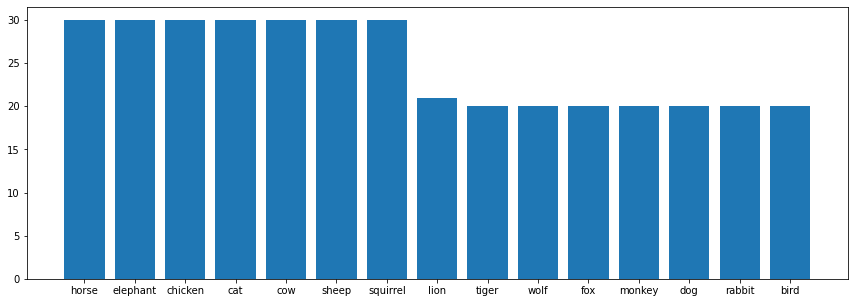

In [ ]:
# Đọc dữ liệu từ đường dẫn và lưu nhãn của nó
import os
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/CS231.M11 Final Project/dataset'
labels = ['horse',
          'elephant',
          'chicken',
          'cat',
          'cow',
          "sheep",
          "squirrel",
          "lion",
          "tiger",
          "wolf",
          "fox",
          "monkey",
          "dog",
          "rabbit",
          "bird"
          ]
amount = []
for label in labels:
    print("Đang đọc dữ liệu của nhãn :", label)
    path = os.path.join(data_dir, label)
    num_images = len(os.listdir(path))
    amount.append(num_images)

plt.figure(figsize=(50, 5))
plt.subplot(131)
plt.bar(labels, amount)


# Excecute extract feature base on types

In [ ]:
types = ['normal','invert', 'gray', 'invert-gray']
batch_extractor(urls, types=types)

Dang xu ly dang:  normal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/371 [00:00<?, ?it/s]

So luong nhan trong CSDL:  371
Dang xu ly dang:  invert


  0%|          | 0/371 [00:00<?, ?it/s]

So luong nhan trong CSDL:  371
Dang xu ly dang:  gray


  0%|          | 0/371 [00:00<?, ?it/s]

So luong nhan trong CSDL:  371
Dang xu ly dang:  invert-gray


  0%|          | 0/371 [00:00<?, ?it/s]

So luong nhan trong CSDL:  371


# Convert all images in dataset into 4 channels and save to another folder


*   normal
*   invert
*   gray
*   invert-gray



In [ ]:
dir_data = '/content/drive/MyDrive/CS231.M11 Final Project/dataset'
dir_save = '/content/drive/MyDrive/CS231.M11 Final Project/types'
# dir_data = '/content/drive/MyDrive/CS231.M11 Final Project/new_dataset'
# dir_save = '/content/drive/MyDrive/CS231.M11 Final Project/new_types'
import glob
import tqdm
import cv2

def read_img(img_path, choice):  # img is from PIL.Image.open(path) or keras.preprocessing.image.load_img(path)
    if choice == 'invert': # tạo ảnh âm bản
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.bitwise_not(img)
    elif choice == 'gray': # tạo ảnh trắng đen
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    elif choice == 'invert-gray': # ảnh âm bản của trắng đen
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.bitwise_not(img)
    else:
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    return img

# list_imgs = glob.glob(dir_data + '/*.jpg')
# list_imgs = glob.glob(dir_data + '/*')
list_imgs = glob.glob(dir_data + '/**/**')
for path_img in tqdm.notebook.tqdm(list_imgs):
    img_name = os.path.split(path_img)[-1]
    cls = os.path.split(os.path.split(path_img)[0])[-1]
    for t in ['normal', 'invert', 'gray', 'invert-gray']:
        if not os.path.exists(dir_save):
            os.mkdir(dir_save)
        img = read_img(path_img, t)
        try:
            print(os.path.join(dir_save,t,img_name))
            cv2.imwrite(os.path.join(dir_save,t,img_name), img)
        except:
            pass

  0%|          | 0/371 [00:00<?, ?it/s]

/content/drive/MyDrive/CS231.M11 Final Project/types/normal/OIP-3XKB0dWhFpLIsq5g12CAKQHaFj.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/invert/OIP-3XKB0dWhFpLIsq5g12CAKQHaFj.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/gray/OIP-3XKB0dWhFpLIsq5g12CAKQHaFj.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/invert-gray/OIP-3XKB0dWhFpLIsq5g12CAKQHaFj.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/normal/OIP-D_RaDzGxjMuBtWTSTiINAQHaFd.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/invert/OIP-D_RaDzGxjMuBtWTSTiINAQHaFd.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/gray/OIP-D_RaDzGxjMuBtWTSTiINAQHaFd.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/invert-gray/OIP-D_RaDzGxjMuBtWTSTiINAQHaFd.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/normal/OIP-B7WSGr63rA6WPOAsWiYKIwHaE9.jpeg
/content/drive/MyDrive/CS231.M11 Final Project/types/invert/OIP-B7WSGr63rA6WPOAsWiYKIwHaE9.jpeg
/content/drive/MyDrive/CS231.M11 F

In [ ]:
temp = glob.glob("/content/drive/MyDrive/CS231.M11 Final Project/types" + '/invert-gray/**')
print(len(temp))

366


# Search Engine

In [ ]:
# Đây là tạo đối tượng tìm kiếm ảnh trong cơ sở đữ liệu.
# Đầu tiên các ma trận vector trong cơ sở dữ liệu
from pyrankagg.rankagg import PartialListRankAggregator

class Search_Engine(object):
    def __init__(self, 
                 pickled_db_normal="/content/drive/MyDrive/CS231.M11 Final Project/features/features_normal.pck",
                 pickled_db_invert="/content/drive/MyDrive/CS231.M11 Final Project/features/features_invert.pck",
                 pickled_db_gray="/content/drive/MyDrive/CS231.M11 Final Project/features/features_gray.pck",
                 pickled_db_gray_invert="/content/drive/MyDrive/CS231.M11 Final Project/features/features_invert-gray.pck"):
        
        self.dict_db_features = {
                              "normal": {'path_data': pickled_db_normal}, 
                              "invert": {'path_data': pickled_db_invert}, 
                              "gray": {'path_data': pickled_db_gray}, 
                              "invert-gray": {'path_data': pickled_db_gray_invert}} # dict lưu feature các loại ảnh
        # Đọc các vector ảnh theo từng loại
        for t in self.dict_db_features:
            with open(self.dict_db_features[t]['path_data'], "rb") as fp:
                self.dict_db_features[t]['features'] = pickle.load(fp)

            self.dict_db_features[t]['name'] = []
            self.dict_db_features[t]['matrix'] = []
            # k: image path
            # v: vector
            for k, v in self.dict_db_features[t]['features'].items():
                self.dict_db_features[t]['name'].append(k)
                self.dict_db_features[t]['matrix'].append(v)
            
            self.dict_db_features[t]['matrix'] = np.array(self.dict_db_features[t]['matrix'])
            self.dict_db_features[t]['name'] = np.array(self.dict_db_features[t]['name'])
        print(self.dict_db_features["normal"])

    # Tinh khoang cach cosine giua vector truy van va cac vector trong du lieu
    def cos_cdist(self, vector, t):
        v = vector.reshape(1, -1)
        return scipy.spatial.distance.cdist(self.dict_db_features[t]['matrix'], v, 'cosine').reshape(-1)

    def borda_sort(lists):
        scores = {}
        for l in lists:
            for idx, elem in enumerate(reversed(l)):
                if not elem in scores:
                    scores[elem] = 0
                scores[elem] += idx
        return sorted(scores.keys(), key=lambda elem: scores[elem], reverse=True)

    # Tim kiem du lieu 
    def match(self, image_path, topn=5):
        PLRA = PartialListRankAggregator()
        choice = ['normal', 'invert', 'gray', 'invert-gray']
        features = {}
        for c in choice:
            features[c] = extract_features(image_path, c) # đọc từng loại ảnh trong list choice của ảnh query
        
        similarity = {'normal': {}, 'invert': {}, 'gray': {}, 'invert-gray': {}}
        for c in choice:
            similarity[c]['cosine_distance'] = self.cos_cdist(features[c], c) # lấy ra cosine distance của từng loại
            similarity[c]['nearest_ids'] = np.argsort(similarity[c]['cosine_distance'])[:topn].tolist() # sort lại rồi lấy topn đầu tiên
            similarity[c]['nearest_img_paths'] = self.dict_db_features[c]['name'][similarity[c]['nearest_ids']].tolist() # lấy ra tên ảnh
            # print('nearest_ids', similarity[c]['nearest_ids'] )
        # ====== calculate final score by get average score of 4 channel
        choice1 = ['invert', 'gray', 'invert-gray']
        total_cosine_distance=similarity["normal"]['cosine_distance']
        for c in choice1:
            total_cosine_distance=np.add(total_cosine_distance,similarity[c]['cosine_distance'])
        average_cosine_distance = total_cosine_distance/4
        nearest_ids_average = np.argsort(average_cosine_distance)[:topn].tolist()
        # print("nearest_ids_average", average_cosine_distance)
        # # [281 279 278]
        # print("score 281", average_cosine_distance[281])
        # print("score 279", average_cosine_distance[279])
        # print("score 278", average_cosine_distance[278])
        nearest_img_paths_average = self.dict_db_features["normal"]['name'][nearest_ids_average].tolist()
        list_score_average = []
        dict_name_with_scores_average = {}
        imgs_name_average =  nearest_img_paths_average
        cosine_scores_average = average_cosine_distance[nearest_ids_average]
        # print("cosine_scores_average", cosine_scores_average)
        for i in range(0, len(imgs_name_average)):
            # dict_name_with_score[imgs_name[i]] = 1 - cosine_scores[i]
            dict_name_with_scores_average[imgs_name_average[i]] = 1 - cosine_scores_average[i]

        # =============
        list_rank = [] # chứa score cosine của 4 loại
        list_score = []
        dict_scores = {}
        for c in choice:
            dict_name_with_rank = {} # Tạo 1 dict gồm cặp key - value là tên ảnh - score cosine
            dict_name_with_scores = {}
            imgs_name = similarity[c]['nearest_img_paths']
            cosine_scores = similarity[c]['cosine_distance'][similarity[c]['nearest_ids']]
            for i in range(0, len(imgs_name)):
                # dict_name_with_score[imgs_name[i]] = 1 - cosine_scores[i]
                dict_name_with_rank[imgs_name[i]] = i + 1
                dict_name_with_scores[imgs_name[i]] = 1 - cosine_scores[i]
                if imgs_name[i] not in dict_scores:
                    dict_scores[imgs_name[i]] = [1 - cosine_scores[i]]
                else:
                    dict_scores[imgs_name[i]].append(1 - cosine_scores[i])

            list_rank.append(dict_name_with_rank)
            list_score.append(dict_name_with_scores)

        _, aggRanks = PLRA.aggregate_ranks(list_rank)

        final_scores = []
        # print("dict_scores", dict_scores)
        aggRanks = {k: v for k, v in sorted(aggRanks.items(), key=lambda item: item[1])} # sort dict by values
        for img in aggRanks.keys():
            final_scores.append(max(dict_scores[img]))

        # lấy ra score của các ảnh
        return list(aggRanks.keys())[:topn], final_scores, list_score, dict_name_with_scores_average

# Handle query similar images from input image

In [ ]:
# Đoạn code hiển thị kết quả ảnh
def show_img(img_path):
    # img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.imread(img_path)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

# Chương trình chạy code dự đoán.
def run(path_query, topn = 10, path_database=None):
    searcher = Search_Engine()
    print('Anh truy van')
    show_img(path_query)
    names, match, all_queries, dict_name_with_scores_average = searcher.match(path_query, topn=topn)
    # print('Kết quả truy vấn normal')
    
    # normal_queries = all_queries[0]
    # for i, img in enumerate(normal_queries):
    #   print("image", img)
    #   print("score", normal_queries[img])
    # for i, img in enumerate(normal_queries):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((match[i])))
    #     print(os.path.join(path_database, 'normal', os.path.split(names[i])[-1]))
    #     show_img(os.path.join(path_database, 'normal', os.path.split(names[i])[-1]))
    #     # show_img(os.path.join(path_database,os.path.split(names[i])[-1]))

    # print('##################################################################################')
    # print('Kết quả truy vấn âm bản')
    # invert_queries = all_queries[1]
    # for i, img in enumerate(invert_queries):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((match[i])))
    #     show_img(os.path.join(path_database, 'invert', os.path.split(names[i])[-1]))

    # print('##################################################################################')
    # print('Kết quả truy vấn trắng đen')
    # gray_queries = all_queries[2]
    # for i, img in enumerate(gray_queries):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((match[i])))
    #     show_img(os.path.join(path_database, 'gray', os.path.split(names[i])[-1]))

    # print('##################################################################################')
    # print('Kết quả truy vấn âm bản-trắng đen')
    # invert_gray_queries = all_queries[3]
    # for i, img in enumerate(invert_gray_queries):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((match[i])))
    #     show_img(os.path.join(path_database, 'invert-gray', os.path.split(names[i])[-1]))

    # print('##################################################################################')
    # for i, img in enumerate(normal_queries):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((normal_queries[img])))
    #     print(os.path.join(path_database, 'normal', os.path.split(names[i])[-1]))
    #     show_img(os.path.join(path_database, 'normal', os.path.split(img)[-1]))
    #     # show_img(os.path.join(path_database,os.path.split(names[i])[-1]))

    # print('##################################################################################')
    # print('Kết quả truy vấn âm bản')
    # invert_queries = all_queries[1]
    # for i, img in enumerate(invert_queries):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((invert_queries[img])))
    #     show_img(os.path.join(path_database, 'invert', os.path.split(img)[-1]))

    # print('##################################################################################')
    # print('Kết quả truy vấn trắng đen')
    # gray_queries = all_queries[2]
    # for i, img in enumerate(gray_queries):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((gray_queries[img])))
    #     show_img(os.path.join(path_database, 'gray', os.path.split(img)[-1]))

    # print('##################################################################################')
    # print('Kết quả truy vấn âm bản-trắng đen')
    # invert_gray_queries = all_queries[3]
    # for i, img in enumerate(invert_gray_queries):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((invert_gray_queries[img])))
    #     show_img(os.path.join(path_database, 'invert-gray', os.path.split(img)[-1]))

    # print('##################################################################################')
    # print('Kết quả truy vấn chung')
    # for i in range(topn):
    #     print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((match[i])))
    #     show_img(os.path.join(path_database, 'normal' ,os.path.split(names[i])[-1]))
    #     # show_img(os.path.join(path_database,os.path.split(names[i])[-1]))
    print('Kết quả truy vấn')
    for i, img in enumerate(dict_name_with_scores_average):
        print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((dict_name_with_scores_average[img])))
        show_img(img)
        # show_img(os.path.join(path_database,os.path.split(names[i])[-1]))

# Execute query similar images from input image

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



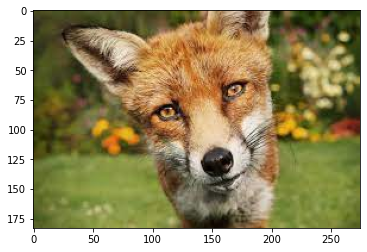

Kết quả truy vấn
So thu tu: 1 Tuong dong: 0.8704729590456105


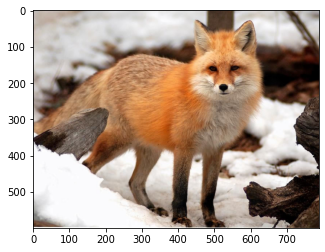

So thu tu: 2 Tuong dong: 0.8661694234532737


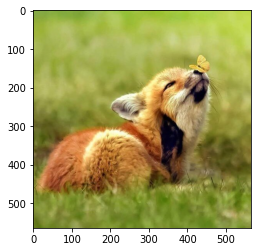

So thu tu: 3 Tuong dong: 0.7950195775750529


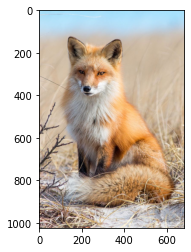

So thu tu: 4 Tuong dong: 0.741399107112642


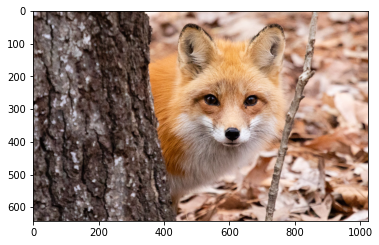

So thu tu: 5 Tuong dong: 0.7166463108783452


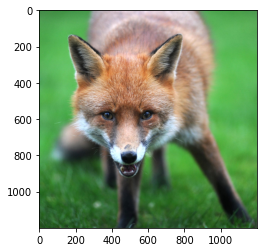

So thu tu: 6 Tuong dong: 0.6745427686585482


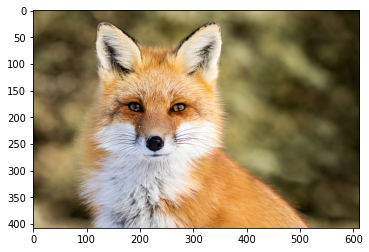

So thu tu: 7 Tuong dong: 0.6674641125001135


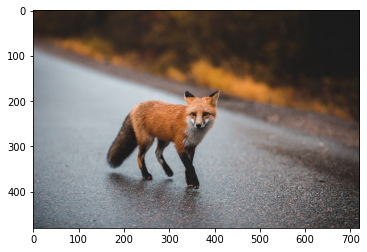

So thu tu: 8 Tuong dong: 0.6672121865474514


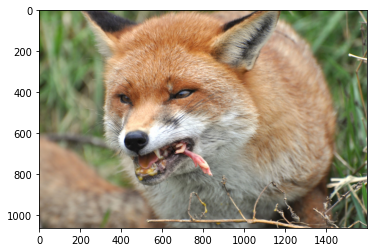

So thu tu: 9 Tuong dong: 0.6004931442732078


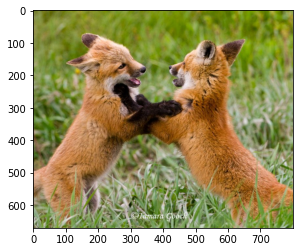

So thu tu: 10 Tuong dong: 0.5809185538322492


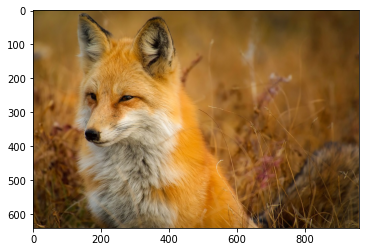

In [ ]:
path_database = '/content/drive/MyDrive/CS231.M11 Final Project/types'
path_query = '/content/drive/MyDrive/CS231.M11 Final Project/testimage/fox.jpeg'
run(path_query, 10, path_database)

# Evaluation

In [ ]:
def calculate_AP(query_label, retrieval_labels): # calculate average precision 
  count_similar_label = 0
  precision = 0
  for i in range(len(retrieval_labels)):
    print(retrieval_labels[i])
    if retrieval_labels[i] == query_label:
      count_similar_label = count_similar_label + 1
      precision = precision + float(count_similar_label/(i+1))
      print(precision)
  if count_similar_label == 0:
    return 0
  else:
    return float(precision/count_similar_label)

In [ ]:
import glob
import tqdm
import cv2
import os
import numpy as np
import pandas as pd


test_path = "/content/drive/MyDrive/CS231.M11 Final Project/testimage"
list_imgs = glob.glob(test_path + '/**')
topn=10
list_AP = []
list_queries = []
for  i in range(1,41):
  list_queries.append("query_"+str(i))
for img in list_imgs:
  current_img = cv2.imread(img)
  cv2_imshow(current_img)
  query_label = os.path.splitext(img)[0].split("/")[-1].split("_")[0]
  # print("query_category", query_label)
  searcher = Search_Engine()
  names, match, all_queries, dict_name_with_scores_average = searcher.match(img, topn=topn)
  retrieval_labels = []
  for i, img in enumerate(dict_name_with_scores_average):
      # print("So thu tu: " +  str(i+1)  + " Tuong dong: " + str((dict_name_with_scores_average[img])))
      label = img.split("/")[-2]
      retrieval_labels.append(label)
      # print("category", label) 
  AP = calculate_AP(query_label, retrieval_labels)
  print("AP", AP)
  list_AP.append(AP)

  # print("dict_name_with_scores_average", dict_name_with_scores_average)
# df=pd.DataFrame(list_AP)
# MAP = np.average(list_AP)
# print("MAP", MAP)
# df

plt.figure(figsize=(50, 5))
plt.subplot(131)
plt.bar(list_queries, list_AP)

Output hidden; open in https://colab.research.google.com to view.